### Buisness Problem Understanding--
#### The object is to predict the classification of sentiments reacted by the customers for a product...based on product description.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("train_product.csv")

In [3]:
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2


In [4]:
 t =pd.read_csv("test_product.csv")
 t.head()

,Text_ID,Product_Description,Product_Type
0,5786.0,RT @mention Going to #SXSW? The new iPhone gui...,7.0
1,5363.0,RT @mention 95% of iPhone and Droid apps have ...,9.0
2,6716.0,RT @mention Thank you to @mention for letting ...,9.0
3,4339.0,#Thanks @mention we're lovin' the @mention app...,7.0
4,66.0,At #sxsw? @mention / @mention wanna buy you a ...,9.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text_ID              6364 non-null   int64 
 1   Product_Description  6364 non-null   object
 2   Product_Type         6364 non-null   int64 
 3   Sentiment            6364 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 199.0+ KB


In [6]:
df.columns

Index(['Text_ID', 'Product_Description', 'Product_Type', 'Sentiment'], dtype='object')

In [7]:
df.Sentiment.value_counts()

2    3765
3    2089
1     399
0     111
Name: Sentiment, dtype: int64

In [8]:
df.isnull().sum()/len(df)

Text_ID                0.0
Product_Description    0.0
Product_Type           0.0
Sentiment              0.0
dtype: float64

In [9]:
df.corr()

,Text_ID,Product_Type,Sentiment
Text_ID,1.000000,0.033520,-0.004539
Product_Type,0.033520,1.000000,-0.440887
Sentiment,-0.004539,-0.440887,1.000000


<AxesSubplot:xlabel='Product_Type'>

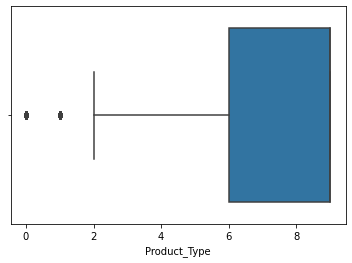

In [10]:
sns.boxplot(df["Product_Type"])

In [11]:
df["Product_Type"].skew()

-1.419409204309499

In [12]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sony\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sony\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### data cleaning

In [14]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
corpus=[]
for i in range(len(df)):
   clean_data = re.sub('[^a-zA-Z]'," ",df["Product_Description"][i])
   clean_data = clean_data.lower()
   clean_data= clean_data.split()
   ps =  PorterStemmer()
   clean_data= [ps.stem(word) for word in clean_data if not word in set(stopwords.words("english"))]
   clean_data=" ".join(clean_data)
   corpus.append(clean_data)


In [ ]:
t.tail(n=5)

In [69]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
corpus2=[]
for i in range(len(t)):
   clean_data = re.sub('[^a-zA-Z]'," ",t["Product_Description"].astype(str)[i])
   clean_data = clean_data.lower()
   clean_data= clean_data.split()
   ps =  PorterStemmer()
   clean_data= [ps.stem(word) for word in clean_data if not word in set(stopwords.words("english"))]
   clean_data=" ".join(clean_data)
   corpus2.append(clean_data)


### vectorization

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
v = tfidf.fit_transform(corpus).toarray()
test_data2 = tfidf.transform(corpus2).toarray()


### X and y

In [17]:
X = v
y = df[["Sentiment"]]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [19]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
y_train

,Sentiment
3032,1
1772,3
2294,1
1237,2
1850,2
...,...
4931,1
3264,2
1653,3
2607,2


### modelling

In [21]:
from sklearn.naive_bayes import MultinomialNB
nv = MultinomialNB()
nv.fit(X_train,y_train)

MultinomialNB()

In [22]:
test_pred= nv.predict(X_test)
train_pred=nv.predict(X_train)

### evaluation

In [23]:
from sklearn.metrics import accuracy_score ,confusion_matrix
test_accuracy= accuracy_score(y_test,test_pred)
train_accuracy= accuracy_score(y_train,train_pred)
print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
from sklearn.model_selection import cross_val_score
scores= cross_val_score(nv,X,y,cv=5)
print(scores)
print("crossvalidation score is :",scores.mean())

test acc=  0.6376963350785341 train_accuracy=  0.720475976650202
[0.63236449 0.64021995 0.62843676 0.65593087 0.63679245]
crossvalidation score is : 0.6387489069053935


In [24]:
params_NB = {'alpha': [0.01, 0.1, 0.5,0.7,0.8,0.85, 1.0, 10.0 ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]*4 ]
         }
from sklearn.model_selection import GridSearchCV
nb= GridSearchCV(nv,params_NB,cv=5,scoring="accuracy")
nb.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 0.7, 0.8, 0.85, 1.0, 10.0],
                         'class_prior': [None, [0.1, 0.1, 0.1, 0.1]],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [25]:
nb.best_params_

{'alpha': 0.5, 'class_prior': None, 'fit_prior': True}

In [70]:
from sklearn.naive_bayes import MultinomialNB
nv2 = MultinomialNB(alpha =1.5, class_prior=None,fit_prior=True)
nv2.fit(X_train,y_train)

MultinomialNB(alpha=1.5)

In [71]:
test_pred= nv2.predict(X_test)
train_pred=nv2.predict(X_train)
from sklearn.metrics import accuracy_score ,confusion_matrix
test_accuracy= accuracy_score(y_test,test_pred)
train_accuracy= accuracy_score(y_train,train_pred)
print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
from sklearn.model_selection import cross_val_score
scores= cross_val_score(nv2,X,y,cv=5)
print(scores)
print("crossvalidation score is :",scores.mean())

test acc=  0.625130890052356 train_accuracy=  0.6782667265379434
[0.62136685 0.62450903 0.62136685 0.63629222 0.61871069]
crossvalidation score is : 0.6244491297237744


##### on the basis of all evaluation matrics of different models...
##### we found the best score with naive bayes algo with Hyperparameter tunning
##### so this model will be saved as final model.

In [72]:
# save the final model
from joblib import dump
dump(nv2,"nlp_product.joblib")

['nlp_product.joblib']

In [73]:
# load the model
from joblib import load
load_model = load('nlp_product.joblib')

##### predicting the sentiment classification with our trained model

In [76]:
sentiment_classification_predictions = load_model.predict(test_data2)   

In [77]:
sentiment_classification_predictions

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)